In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [170]:
import pandas as pd
import numpy as np


In [171]:
df1 = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
df2 = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
df1['category'] = 0 
df2['category'] = 1

In [172]:
df = pd.concat([df1,df2])

In [173]:
df1=df
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [174]:
df['text'] = df['text'] + " " + df['title'] + " " + df['subject']

In [175]:
pd.set_option('display.max_colwidth', -1)
df.head(1)

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images. Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing News",News,"December 31, 2017",0


In [176]:
del df['title']
del df['subject']
del df['date']

# CLEANING OF DATA

In [177]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation , '')
    return text

df['text'] = df['text'].apply(remove_punctuations)

In [178]:
df["text"] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\d+', '')
df['text'] = df["text"].str.lower()
df1=df

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
import nltk

In [180]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [181]:
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
def stem_text(text):
    f_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            f_text.append(word)
    return " ".join(f_text)

In [182]:
df['text'] = df['text'].apply(stem_text)

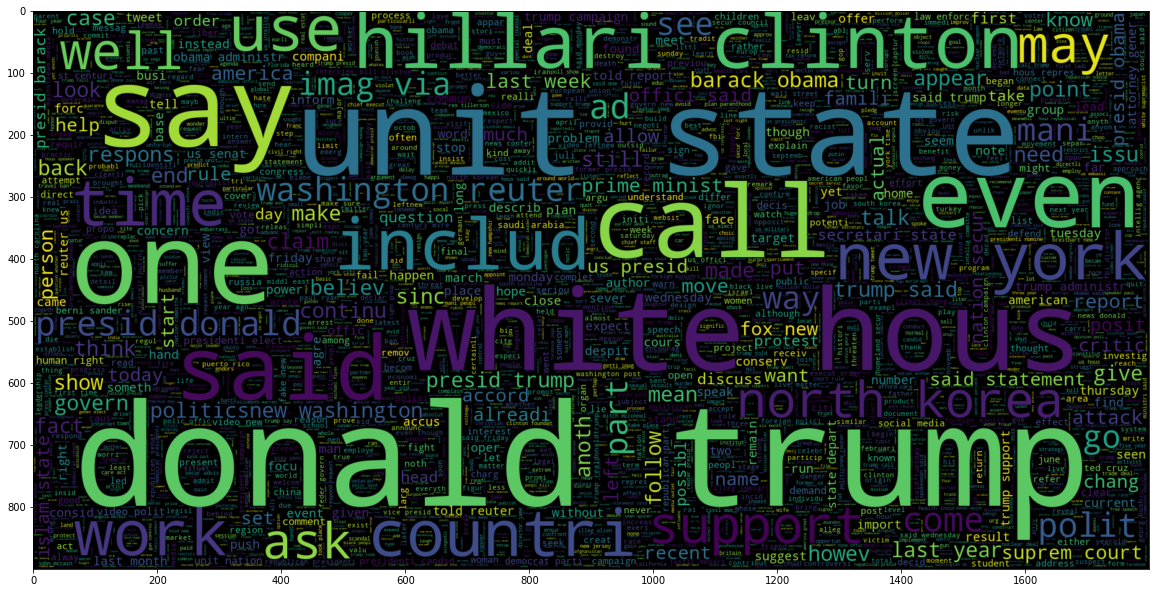

In [183]:
from wordcloud import WordCloud , STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=4000 , width=1800 , height=900, stopwords = STOPWORDS ).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)

# COUNTVECTORIZATION TECHNIQUE

In [186]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (33673, 1778508)
BOW_cv_test: (11225, 1778508)


In [187]:
print(cv_train_reviews)

  (0, 819378)	1
  (0, 1374596)	1
  (0, 763692)	1
  (0, 501327)	1
  (0, 1132438)	1
  (0, 1074318)	1
  (0, 539800)	1
  (0, 884618)	1
  (0, 602868)	1
  (0, 1303142)	1
  (0, 679091)	1
  (0, 915210)	1
  (0, 1752155)	1
  (0, 1429819)	1
  (0, 1281488)	1
  (0, 1374941)	1
  (0, 761465)	1
  (0, 1545575)	1
  (0, 622928)	1
  (0, 1102247)	1
  (0, 1657233)	1
  (0, 1721194)	1
  (0, 1174515)	1
  (0, 857809)	1
  (0, 1756770)	1
  :	:
  (33672, 582010)	1
  (33672, 1079544)	1
  (33672, 1258673)	1
  (33672, 1079584)	1
  (33672, 725399)	1
  (33672, 208399)	1
  (33672, 343959)	1
  (33672, 1326296)	1
  (33672, 1130156)	1
  (33672, 1722209)	1
  (33672, 405286)	1
  (33672, 779445)	1
  (33672, 997832)	1
  (33672, 1464993)	1
  (33672, 971542)	1
  (33672, 1498225)	1
  (33672, 920772)	1
  (33672, 1225400)	1
  (33672, 90187)	1
  (33672, 851231)	1
  (33672, 405251)	1
  (33672, 916500)	1
  (33672, 1302170)	1
  (33672, 97983)	1
  (33672, 1690870)	1


In [192]:
#print(cv.get_feature_names())

In [193]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [194]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

print(cv_train_reviews)

  (0, 819378)	1
  (0, 1374596)	1
  (0, 763692)	1
  (0, 501327)	1
  (0, 1132438)	1
  (0, 1074318)	1
  (0, 539800)	1
  (0, 884618)	1
  (0, 602868)	1
  (0, 1303142)	1
  (0, 679091)	1
  (0, 915210)	1
  (0, 1752155)	1
  (0, 1429819)	1
  (0, 1281488)	1
  (0, 1374941)	1
  (0, 761465)	1
  (0, 1545575)	1
  (0, 622928)	1
  (0, 1102247)	1
  (0, 1657233)	1
  (0, 1721194)	1
  (0, 1174515)	1
  (0, 857809)	1
  (0, 1756770)	1
  :	:
  (33672, 582010)	1
  (33672, 1079544)	1
  (33672, 1258673)	1
  (33672, 1079584)	1
  (33672, 725399)	1
  (33672, 208399)	1
  (33672, 343959)	1
  (33672, 1326296)	1
  (33672, 1130156)	1
  (33672, 1722209)	1
  (33672, 405286)	1
  (33672, 779445)	1
  (33672, 997832)	1
  (33672, 1464993)	1
  (33672, 971542)	1
  (33672, 1498225)	1
  (33672, 920772)	1
  (33672, 1225400)	1
  (33672, 90187)	1
  (33672, 851231)	1
  (33672, 405251)	1
  (33672, 916500)	1
  (33672, 1302170)	1
  (33672, 97983)	1
  (33672, 1690870)	1


In [195]:
print(cv_train_reviews.shape)
print(y_train.shape)

(33673, 1778508)
(33673,)


In [196]:
model.fit(cv_train_reviews,y_train , epochs = 1)

Epoch 1/1
33673/33673 [==============================] - 493s 15ms/step - loss: 0.6920 - accuracy: 0.5245


In [197]:
pred = model.predict(cv_test_reviews)
print(pred.shape)
print(y_test.shape)


(11225, 1)
(11225,)


# ACCURACY USING COUNT VECTORIZATION

In [198]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0
        
from sklearn.metrics import accuracy_score 
accuracy_score(pred,y_test)

0.5179510022271715

# TFIDF TECHNIQUE

In [199]:
tv = TfidfVectorizer()
X = tv.fit_transform(x_train)
Y = tv.transform(x_test)
print(len(tv.get_feature_names()))


160238


In [200]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = X.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.fit(X,y_train , epochs = 1)



Epoch 1/1
33673/33673 [==============================] - 45s 1ms/step - loss: 0.0578 - accuracy: 0.9837


# ACCURACY USING TFIDF VECTORIZATION

In [201]:
pred = model.predict(Y)

for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0
        
from sklearn.metrics import accuracy_score 
accuracy_score(pred,y_test)

0.9959910913140312

# DECISION TREE TECHNIQUE

In [202]:
print(pred.shape)
print(y_test.shape)
from sklearn.tree import DecisionTreeClassifier

(11225, 1)
(11225,)


In [204]:

print(y_train.shape)
print(X.shape)

(33673,)
(33673, 160238)


In [205]:
clf = DecisionTreeClassifier()
clf = clf.fit(X,y_train)

In [206]:
y_pred = clf.predict(Y)

In [208]:

print(y_pred.shape)

(11225,)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
Accuracy: 0.9977728285077951